In [1]:
from datetime import datetime
import os
os.environ['MPLCONFIGDIR'] = "/wrk-vakka/users/hajaalin/tmp_mplconfigdir"
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

def read_output_files(dirs):
    files = []
    for d in dirs:
        files.extend(Path(d).glob('*/*.csv'))

    scores_all = []

    for f in files:
        df = pd.read_csv(f)
        df['dir'] = str(Path(f).parent)
        scores_all.append(df)

    return pd.concat(scores_all)


In [2]:
output_dirs = ['/proj/hajaalin/Projects/n_track_ML/output/cross-validation/k20_reshape_input_all_20221209']
df = read_output_files(output_dirs)
df.head()

,accuracy,precision,recall,f1,repeat,cv,classifier,fset,kernel_size,epochs,job_id,dir
0,0.500000,0.392857,0.392857,0.392857,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,20,10,272814433,/proj/hajaalin/Projects/n_track_ML/output/cros...
1,0.445946,0.531915,0.568182,0.549451,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,20,10,272814433,/proj/hajaalin/Projects/n_track_ML/output/cros...
2,0.472973,0.590909,0.553191,0.571429,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,20,10,272814433,/proj/hajaalin/Projects/n_track_ML/output/cros...
3,0.547945,0.507463,1.000000,0.673267,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,20,10,272814433,/proj/hajaalin/Projects/n_track_ML/output/cros...
4,0.527027,0.527273,0.763158,0.623656,2.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,20,10,272814433,/proj/hajaalin/Projects/n_track_ML/output/cros...


In [3]:
grp = df.groupby(['kernel_size','fset','epochs'])['accuracy'].agg(['mean','std'])
grp = grp.reset_index(level=2)
grp.head()

epochs      mean       std
kernel_size fset                            
20          all        2  0.541547  0.078677
            all        4  0.566561  0.069886
            all        6  0.567075  0.074293
            all        8  0.560760  0.078052
            all       10  0.548145  0.077762

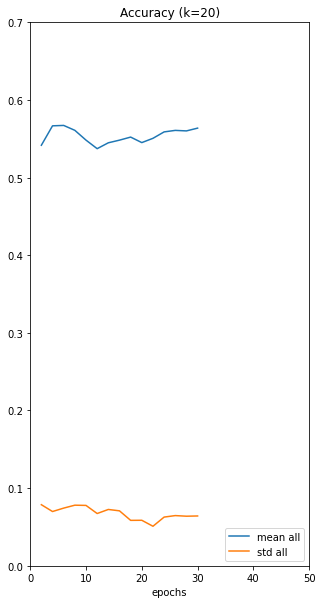

In [4]:

# copy data in a new dataframe, separate feature sets
ddd = pd.DataFrame()

# only k20 was tested until 300 epochs
#fsets = ['f_dxy','f_dxy_angle','f_dxy_angle_morph','f_dxy_angle_area']
fsets = ['all']
for i in range(len(fsets)):
    ddd['epochs_'+fsets[i]] = pd.Series(grp.loc[20,fsets[i]]['epochs'].values)
    ddd['mean '+fsets[i]] = pd.Series(grp.loc[20,fsets[i]]['mean'].values)
    ddd['std '+fsets[i]] = pd.Series(grp.loc[20,fsets[i]]['std'].values)
    
# check that epochs are the same for all feature sets
#test = ~((ddd['epochs_f_dxy'] == ddd['epochs_f_dxy_angle']) & (ddd['epochs_f_dxy_angle'] == ddd['epochs_f_dxy_angle_area']))
#print(ddd[test].shape)
#assert ddd[test].shape[0] == 0

ddd['epochs'] = ddd['epochs_all']
for f in fsets:
    ddd.drop(columns=['epochs_' + f], inplace=True)
#print(ddd.head())

fig = plt.figure()
fig.add_subplot()
ax = fig.axes

#ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
#          ncol=2, fancybox=True, shadow=True)


#style = {'mean fset_f_x':':','std fset_f_x':':','mean fset_f_y':'--','std fset_f_y':'--','mean fset_f_morph':'-','std fset_f_morph':'-',}
#ddd.plot('epochs', title='Accuracy (k=20)', xlim=(0,80), ylim=(0,1), figsize=(5,10), style=style, ax=ax[0])
ddd.plot('epochs', title='Accuracy (k=20)', xlim=(0,50), ylim=(0.0,.7), figsize=(5,10), ax=ax[0]).legend(loc='lower right')
plot_dir = Path('/proj/hajaalin/Projects/n_track_ML/output/images')
plot_dir.mkdir(exist_ok=True)
ts = datetime.now().strftime('%Y%m%d%H%M')
plt.savefig(plot_dir / ('accuracy_%s.png' % ts))